In [11]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

In [13]:
df = pd.read_csv("./preprocessed_crop_production.csv")

In [14]:
df

,state_name,district_name,crop_year,season,crop,area,production,yield
0,Andaman and Nicobar Islands,NICOBARS,0.166667,Kharif,Arecanut,1.461475e-04,1.598977e-06,1.594896
1,Andaman and Nicobar Islands,NICOBARS,0.166667,Kharif,Other Kharif pulses,2.284356e-07,7.994883e-10,0.500000
2,Andaman and Nicobar Islands,NICOBARS,0.166667,Kharif,Rice,1.188331e-05,2.566358e-07,3.147059
3,Andaman and Nicobar Islands,NICOBARS,0.166667,Whole Year,Banana,2.050792e-05,5.124720e-07,3.642045
4,Andaman and Nicobar Islands,NICOBARS,0.166667,Whole Year,Cashewnut,8.391044e-05,1.319156e-07,0.229167
...,...,...,...,...,...,...,...,...
242563,West Bengal,PURULIA,0.944444,Summer,Rice,3.565926e-05,6.403902e-07,2.617647
242564,West Bengal,PURULIA,0.944444,Summer,Sesamum,7.307141e-05,3.701631e-07,0.738437
242565,West Bengal,PURULIA,0.944444,Whole Year,Sugarcane,3.775714e-05,1.299169e-05,50.154321
242566,West Bengal,PURULIA,0.944444,Winter,Rice,3.253470e-02,4.780133e-04,2.141848


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['state_name', 'district_name', 'season', 'crop', 'yield'])
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (194054, 3)
x_test : (48514, 3)
y_train : (194054,)
y_test : (48514,)


In [16]:
X_train
y_train

,crop_year,area,production
75744,0.500000,0.000961,1.143028e-05
19877,0.055556,0.002548,3.462184e-05
139158,0.444444,0.000129,4.445955e-06
88084,0.055556,0.000270,2.196194e-06
176391,0.333333,0.003529,6.313559e-06
...,...,...,...
119879,0.888889,0.000304,1.932363e-06
103694,0.333333,0.000637,1.477454e-06
131932,0.055556,0.000699,2.718260e-06
146867,0.000000,0.000050,3.022066e-07


75744     1.733920
19877     1.981016
139158    5.018953
88084     1.184562
176391    0.260782
            ...   
119879    0.927831
103694    0.338338
131932    0.566667
146867    0.881119
121958    0.208681
Name: yield, Length: 194054, dtype: float64

In [17]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 5)
model.fit(X_train,y_train)

decisiontree_predict = model.predict(X_test)
decisiontree_predict

DecisionTreeRegressor(random_state=5)

array([ 1.34126984,  8.        ,  0.4       , ...,  0.42780749,
        2.46755892, 87.06493094])

In [18]:
model.score(X_test,y_test)

0.9606409591546647

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9606409591546647


In [20]:
Adjr2_2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.9606385250766903


<Axes: xlabel='yield', ylabel='Density'>

Text(0.5, 1.0, 'Decision Tree Regression')

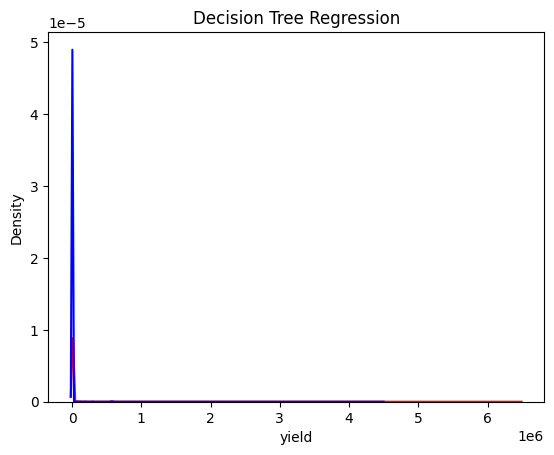

In [21]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

In [22]:
joblib.dump(model, "./dt_model.pkl") 
print("Model saved successfully.")

['./dt_model.pkl']

Model saved successfully.


In [23]:
model = joblib.load("./dt_model.pkl")
print("Model loaded successfully.")

Model loaded successfully.


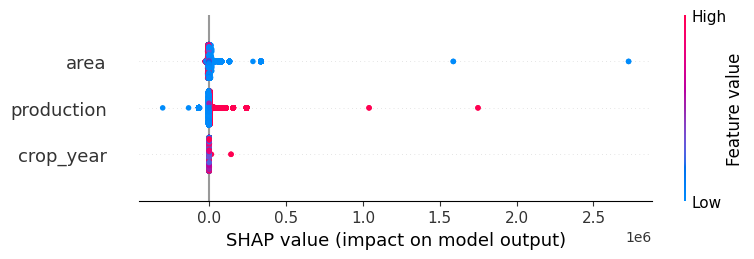

In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

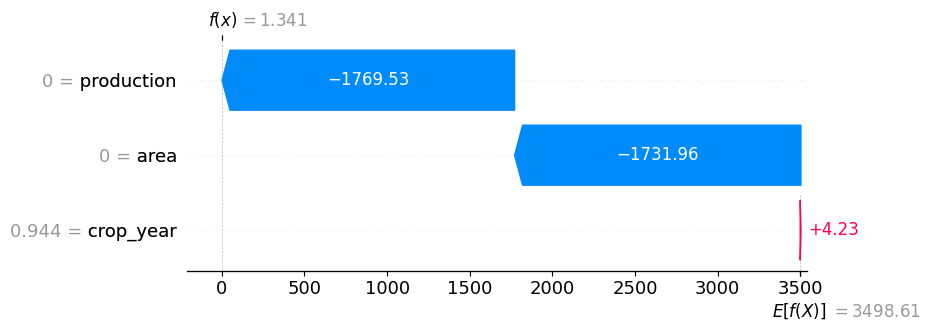

In [26]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[0],  
        base_values=explainer.expected_value, 
        data=X_test.iloc[0, :],  
        feature_names=X_test.columns  
    )
)


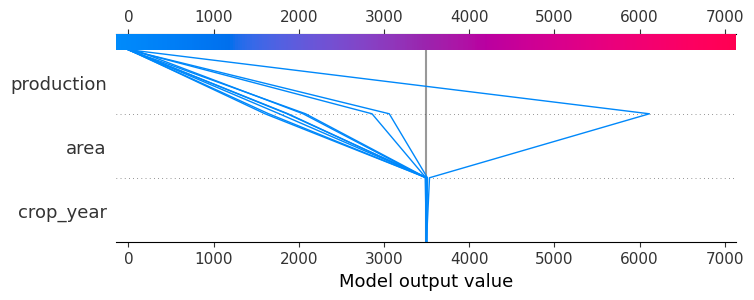

In [30]:
shap.decision_plot(
    explainer.expected_value, 
    shap_values[:10],  
    X_test.iloc[:10],  
    feature_names=np.array(X_test.columns)  
)

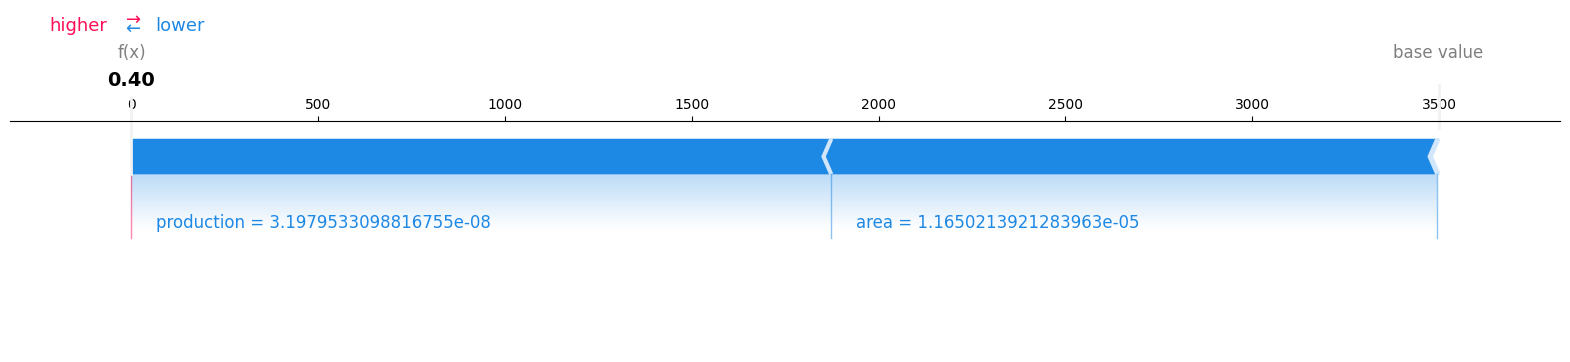

In [33]:
shap.force_plot(
    explainer.expected_value, 
    shap_values[2],  
    X_test.iloc[2, :],  
    matplotlib=True
)